# Assignment3

11911839 聂雨荷

## 0. Package Requirement

In [1]:
import torch
from torch import nn
from torchvision.utils import save_image
from matplotlib import pyplot as plt
import numpy as np
import copy

### Set up Random Seeds

In [2]:
def set_seeds(seed):
    torch.manual_seed(seed)  # 固定随机种子（CPU）
    if torch.cuda.is_available():  # 固定随机种子（GPU)
        torch.cuda.manual_seed(seed)  # 为当前GPU设置
        torch.cuda.manual_seed_all(seed)  # 为所有GPU设置
    np.random.seed(seed)  # 保证后续使用random函数时，产生固定的随机数

In [3]:
set_seeds(42)

## 1. PyTorch LSTM

### 1.1 Task1
Implement the LSTM without using torch.nn.LSTM. Follow the skeleton provided in **train.py** (for the training)
and **lstm.py** (to define the model). For the forward pass you will need to use a for loop to step through time and
apply the recurrence equations that define the network behaviour. For the backward pass you can rely on Pytorch
automatic differentiation and use the RMSProp optimiser for tuning the weights.

In [4]:
import train as LSTM
import train_rnn as RNN

### 1.2 Task 2
Given the LSTM implemented in Task 1 and a palindrome of length T, the network should be able to predict the
T-th digit given the preceding T − 1 ones. You should be able to obtain close to perfect accuracy with T = 5 and the
default parameters provided in the python files. Note that you might need to adjust the parameters, particularly
the learning rate, when increasing the sequence length. You should observe a better performance when compared
to the RNN you’ve implemented in the previous assignment

#### The training result of LSTM module(T = 10, epoch = 100)

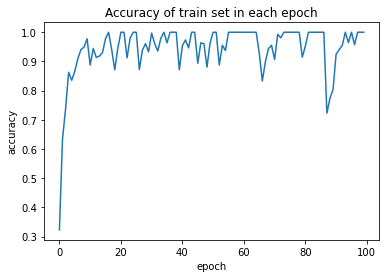

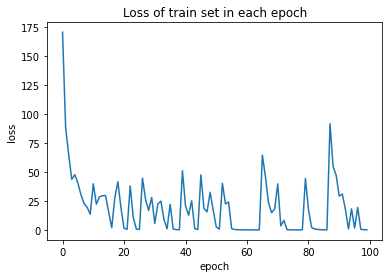

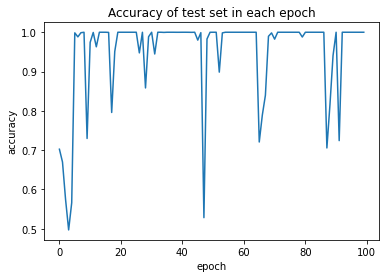

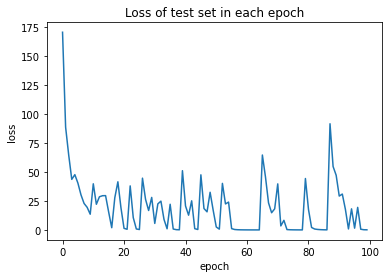

Done training.


[0.322865099009901,
 0.6338180693069307,
 0.7373143564356436,
 0.8627784653465347,
 0.8351639851485149,
 0.8664139851485149,
 0.9096534653465347,
 0.9407487623762376,
 0.9487159653465347,
 0.9774133663366337,
 0.887762995049505,
 0.9443069306930693,
 0.913753094059406,
 0.9182394801980198,
 0.929996905940594,
 0.9780321782178217,
 1.0,
 0.9404393564356436,
 0.8713644801980198,
 0.9457766089108911,
 1.0,
 1.0,
 0.9122060643564357,
 0.9795792079207921,
 1.0,
 1.0,
 0.872137995049505,
 0.9389696782178217,
 0.9609375,
 0.9332456683168316,
 0.997137995049505,
 0.9603960396039604,
 0.9356435643564357,
 0.9797339108910891,
 1.0,
 0.963799504950495,
 1.0,
 1.0,
 1.0,
 0.8714418316831684,
 0.953434405940594,
 0.973855198019802,
 0.9466274752475248,
 1.0,
 1.0,
 0.8935643564356436,
 0.9639542079207921,
 0.9603960396039604,
 0.880569306930693,
 0.963490099009901,
 0.9999226485148515,
 1.0,
 0.887762995049505,
 0.955368193069307,
 0.9372679455445545,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,

In [5]:
LSTM.main()

#### The training result of RNN module(T=10, epoch = 100)

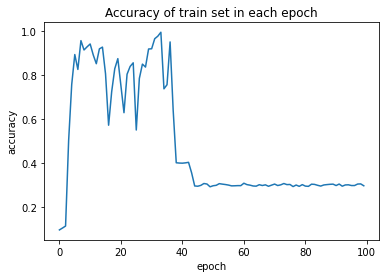

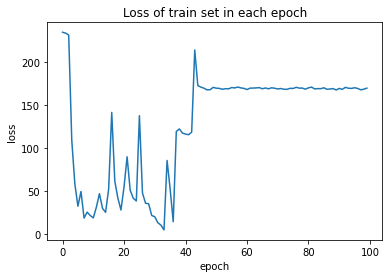

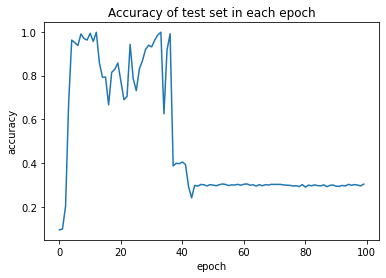

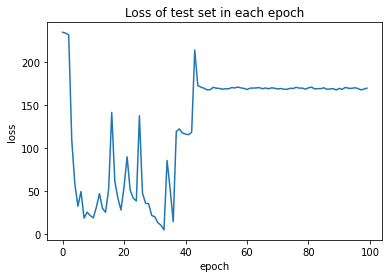

Done training.


[0.0958384900990099,
 0.10442450495049505,
 0.11339727722772278,
 0.502552599009901,
 0.7568069306930693,
 0.8927908415841584,
 0.8251082920792079,
 0.955987004950495,
 0.9135983910891089,
 0.9278310643564357,
 0.9408261138613861,
 0.8910891089108911,
 0.8510983910891089,
 0.9185488861386139,
 0.9265934405940595,
 0.8051516089108911,
 0.5716274752475248,
 0.7241646039603961,
 0.828434405940594,
 0.8741491336633663,
 0.7517017326732673,
 0.6284808168316832,
 0.8032178217821783,
 0.838644801980198,
 0.8551980198019802,
 0.5498143564356436,
 0.7842667079207921,
 0.849319306930693,
 0.8359375,
 0.9179300742574258,
 0.9190903465346535,
 0.9647277227722773,
 0.9760983910891089,
 0.9941212871287128,
 0.7370049504950495,
 0.7556466584158416,
 0.9501082920792079,
 0.6399288366336634,
 0.400990099009901,
 0.39967512376237624,
 0.39913366336633666,
 0.4006033415841584,
 0.40292388613861385,
 0.3551980198019802,
 0.2955600247524752,
 0.2943997524752475,
 0.29826732673267325,
 0.3066986386138614,
 

In [248]:
RNN.main()

The result shows that **LSTM performs better than RNN**

## 2. Generative Adversarial Networks

### 2.1 Task 1
Build your GAN in PyTorch using the template **my_gan.py**. Train it on the MNIST dataset provided in the dataset
folder (the python file inside can be used to download the data and create the traninig and test sets).


In [4]:
import my_gan

### 2.2 Task 2
Sample 25 images from your trained GAN and include these in a jupyter notebook. Do this at the start of training,
halfway through training and after training has terminated.


#### The start of training

![start](./0.png)

#### Halfway through training

![half](./23000.png)

#### After training has terminated

![finish](46500.png)

### 2.3 Task 3
Sample 2 images from your GAN (make sure that they are of different classes). Interpolate between these two digits
in latent space and include the results in your jupyter notebook. Use 7 interpolation steps, resulting in 9 images
(including start and end point).


In [5]:
from my_gan import Generator

In [6]:
def tensor2img(imgs_tensor, batch):
    """
        :param imgs: (batch_size, 784)
        :return: 转换成 (batch_size, 1, 28, 28)的大小
    """
    img = 0.5 * (imgs_tensor + 1)  # 将x的范围由(-1,1)伸缩到(0,1)
    img = img.view(batch, 1, 28, 28)
    return img

In [7]:
G = Generator(16)
G.load_state_dict(torch.load('mnist_generator.pt'))

<All keys matched successfully>

In [8]:
batch = 100

In [9]:
z = torch.randn((batch, 16))
imgs_generate = G(z)
gen_imgs = tensor2img(imgs_generate,batch)
save_image(gen_imgs[:49], 'images.png', nrow=7, normalize=True)

## Important: z is the temp value store in one calculation
## If you want to reappear the solution, please restart the kernel and re-execute package requirement and the code in part2

#### The generator images
![images](./images.png)

#### Parameters that generate 9

tensor([ 0.1781, -0.0284, -0.8054, -0.1144,  0.7702,  2.5644, -0.0262, -1.9987,
        -0.5774, -1.8136,  0.9678,  0.6415,  1.0710, -0.6408, -1.5412,  0.7375])


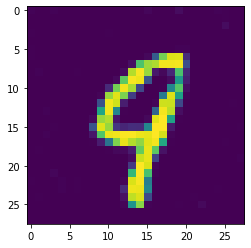

In [16]:
print(z[6])
#save_image(gen_imgs[6], '9.png', nrow=1, normalize=True)
plt.imshow(gen_imgs[6].squeeze(0).detach().numpy())

#### Parameters that generate 3

tensor([ 1.5143, -1.2631, -1.8517,  0.2168, -0.5392, -0.0377,  0.3759,  2.4200,
         1.0867,  1.5915,  0.6726,  0.0979,  0.3848, -0.1350,  3.5230, -0.9687])


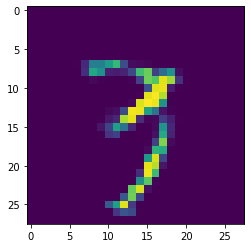

In [17]:
print(z[18])
#save_image(gen_imgs[18], '3.png', nrow=1, normalize=True)
plt.imshow(gen_imgs[18].squeeze(0).detach().numpy())

In [12]:
def get_interpolation_torch(start, end, steps):
    z_list = list()
    z_div = ((end-start)/(steps+2)).numpy()
    z_temp = copy.copy(start.numpy())
    z_list.append(start.numpy())
    for i in range(steps):
        z_temp += z_div
        z_list.append(copy.copy(z_temp))
    z_list.append(end.numpy())
    z_arr = np.array(z_list)
    z_torch_inter = torch.Tensor(z_arr)
    return z_torch_inter

#### get the interpolation result

In [13]:
z_torch_inter = get_interpolation_torch(z[6], z[18], 7)

In [14]:
z_torch_inter

tensor([[ 0.1781, -0.0284, -0.8054, -0.1144,  0.7702,  2.5644, -0.0262, -1.9987,
         -0.5774, -1.8136,  0.9678,  0.6415,  1.0710, -0.6408, -1.5412,  0.7375],
        [ 0.3265, -0.1655, -0.9216, -0.0776,  0.6247,  2.2753,  0.0185, -1.5077,
         -0.3925, -1.4352,  0.9350,  0.5811,  0.9948, -0.5846, -0.9785,  0.5479],
        [ 0.4750, -0.3027, -1.0379, -0.0408,  0.4792,  1.9862,  0.0632, -1.0168,
         -0.2076, -1.0569,  0.9022,  0.5207,  0.9185, -0.5284, -0.4158,  0.3583],
        [ 0.6235, -0.4399, -1.1542, -0.0040,  0.3337,  1.6971,  0.1079, -0.5258,
         -0.0227, -0.6786,  0.8694,  0.4603,  0.8423, -0.4722,  0.1469,  0.1687],
        [ 0.7720, -0.5771, -1.2704,  0.0328,  0.1882,  1.4079,  0.1525, -0.0348,
          0.1622, -0.3002,  0.8366,  0.3999,  0.7660, -0.4160,  0.7096, -0.0209],
        [ 0.9204, -0.7143, -1.3867,  0.0696,  0.0427,  1.1188,  0.1972,  0.4561,
          0.3471,  0.0781,  0.8038,  0.3395,  0.6898, -0.3598,  1.2723, -0.2104],
        [ 1.0689, -0.8

In [15]:
imgs_generate_inter = G(z_torch_inter)
gen_imgs_inter = tensor2img(imgs_generate_inter,9)
save_image(gen_imgs_inter[:9], 'interpolation_between_9_and_3.png', nrow=3, normalize=True)

![image](./interpolation_between_9_and_3.png)